BIG MART SALES PREDICTION


Part-1 Data Visualisation

Importing required libraries

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [137]:
Train_data=pd.read_csv("train_data.csv")
Test_data=pd.read_csv("test_data.csv")

In [138]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [139]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Shape or size of training and testing data

In [140]:
print(Train_data.shape)

(8523, 12)


In [141]:
print(Test_data.shape)

(5681, 11)


Summary statistics

In [142]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


Finding missing values in each column

In [143]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [144]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Combining training and testing data to single dataframe

In [145]:
Train_data['source']='train' #adding new column source and giving the value train
Test_data['source']='test'
df=pd.concat([Train_data,Test_data],ignore_index=True)

In [146]:
df.drop('sources',axis=1,inplace=True)

KeyError: "['sources'] not found in axis"

In [147]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [148]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [149]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [150]:
df.shape

(14204, 13)

Plotting some graphs to see distribution

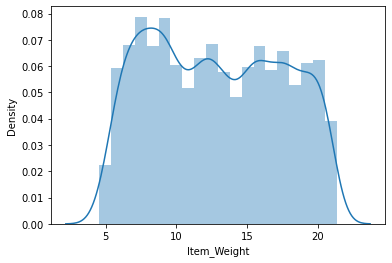

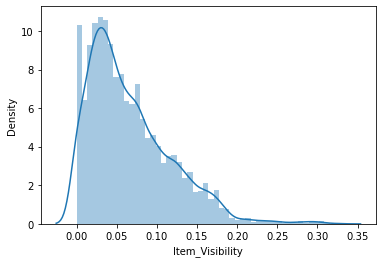

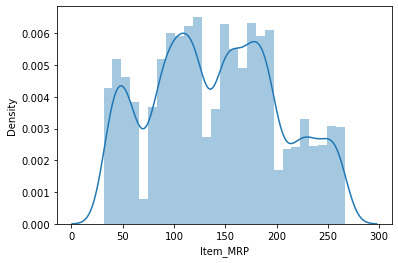

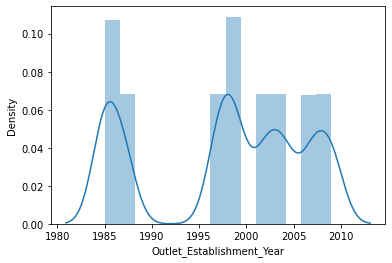

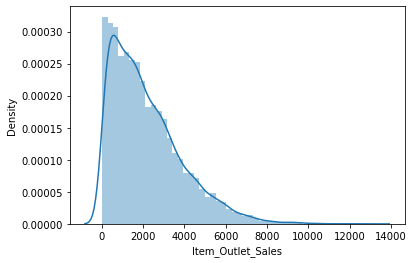

In [151]:
for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()

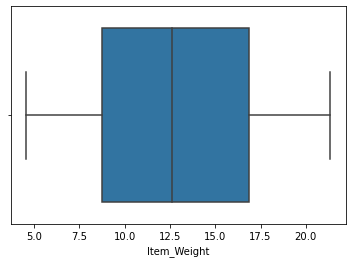

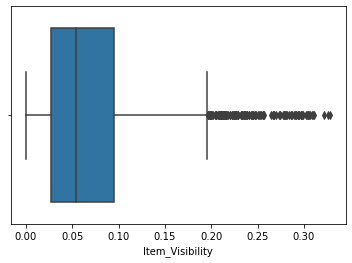

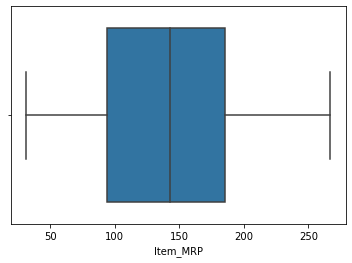

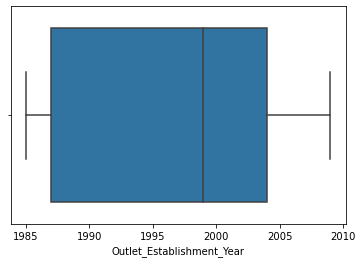

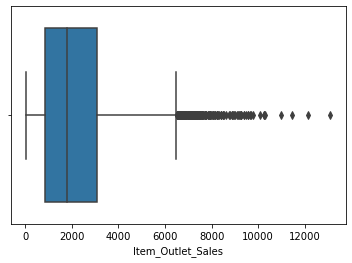

In [152]:
for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

plotting countplot to see Different types of Items present and their count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

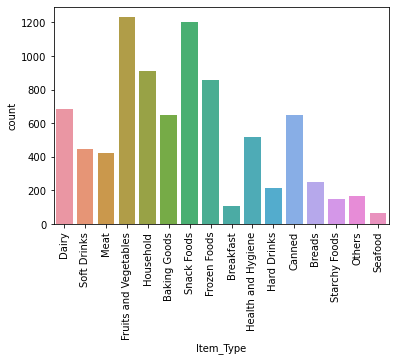

In [153]:
sns.countplot(Train_data.Item_Type)
plt.xticks(rotation=90)

In [154]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Distribution of outleet_size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

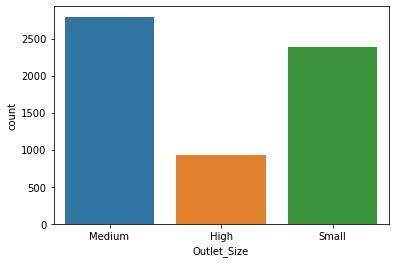

In [155]:
sns.countplot(Train_data.Outlet_Size)

In [156]:
Train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Distribution of the Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

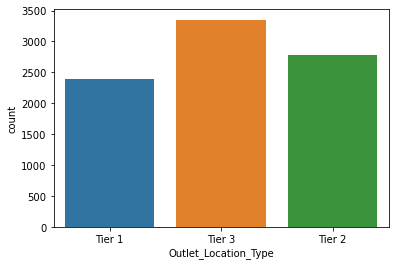

In [157]:
sns.countplot(Train_data.Outlet_Location_Type)

In [158]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Distribution of Outlet_type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

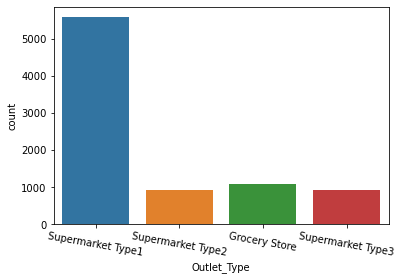

In [159]:
sns.countplot(Train_data.Outlet_Type)
plt.xticks(rotation=-10)

In [160]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

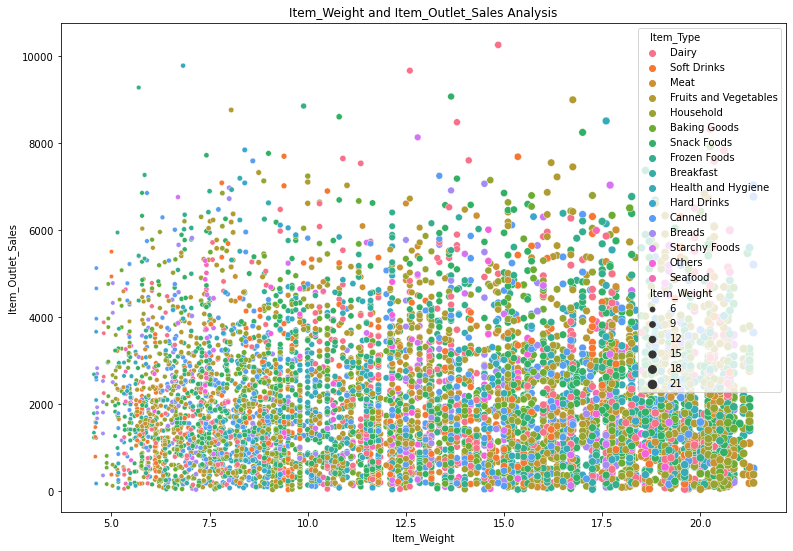

In [161]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
#plt.plot(Train_data.Item_Weight,Train_data.Item_Outlet_Sales,'.',alpha=0.3)
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue="Item_Type",size="Item_Weight",data=Train_data)

<AxesSubplot:title={'center':'Item_Visibility and Item_Outlet_Sales Analysis'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

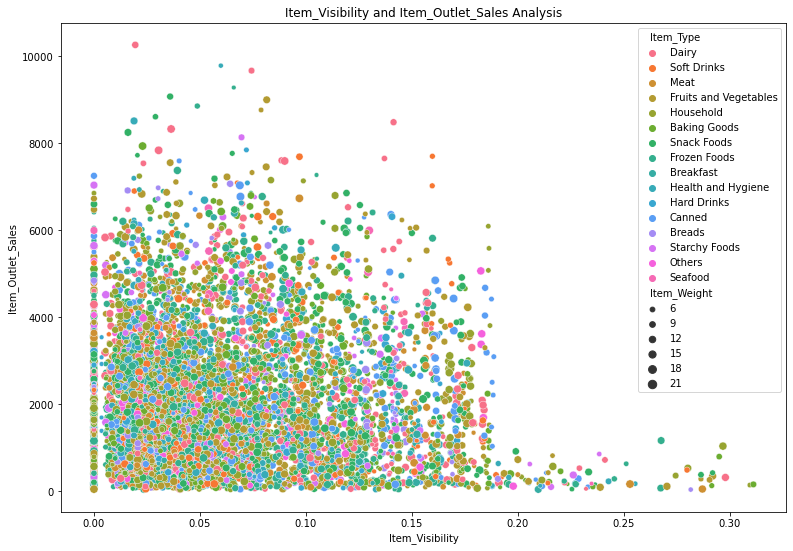

In [162]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
#plt.plot(Train_data.Item_Visibility,Train_data.Item_Outlet_Sales,'.',alpha=0.3)
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue="Item_Type",size="Item_Weight",data=Train_data)

<AxesSubplot:title={'center':'Item_Visibility and Maximum Retail Price Analysis'}, xlabel='Item_Visibility', ylabel='Maximum Retail Price'>

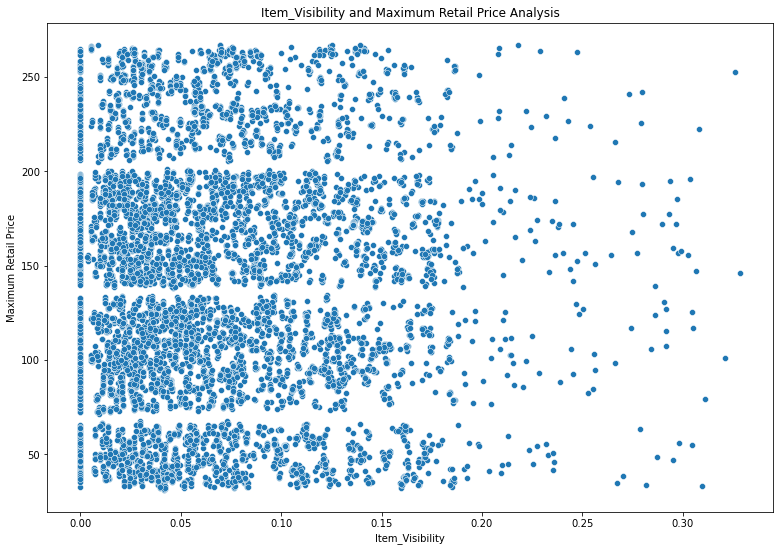

In [163]:
 plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_Visibility and Maximum Retail Price Analysis")
#plt.plot(Train_data.Item_Visibility,Train_data.Item_MRP,'.',alpha=0.3)
sns.scatterplot(x="Item_Visibility",y="Item_MRP",data=Train_data)

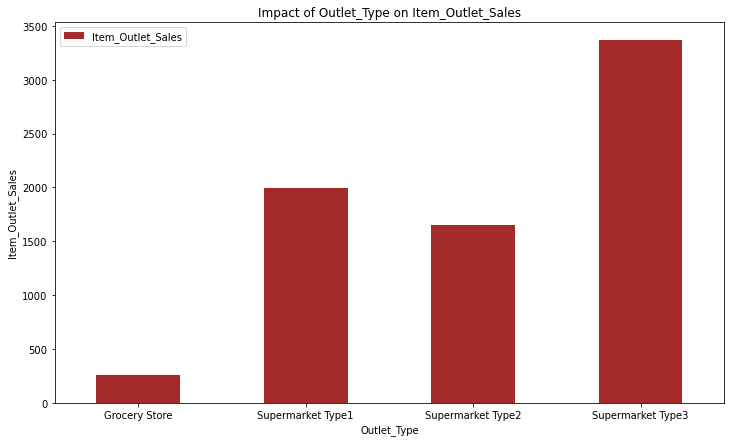

In [164]:
Outlet_Type_pivot=\
Train_data.pivot_table(index="Outlet_Type",values="Item_Outlet_Sales",aggfunc=np.median)

Outlet_Type_pivot.plot(kind="bar",color="brown",figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [165]:
print(Train_data.pivot_table(index="Outlet_Type",values="Item_Outlet_Sales",aggfunc=np.median))

                   Item_Outlet_Sales
Outlet_Type                         
Grocery Store               256.9988
Supermarket Type1          1990.7420
Supermarket Type2          1655.1788
Supermarket Type3          3364.9532


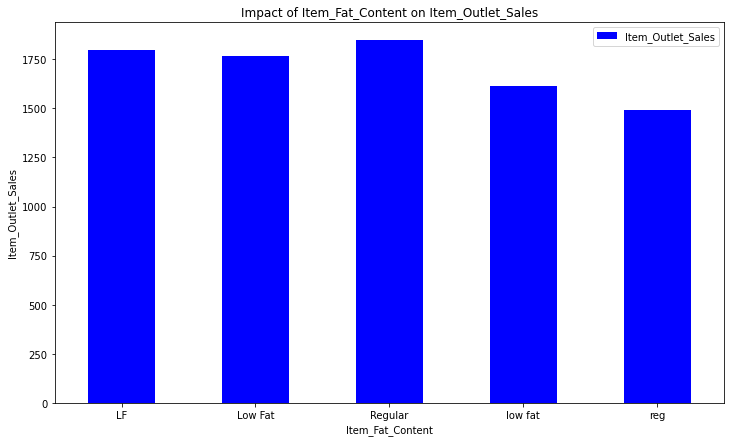

In [166]:
Item_Fat_Content_pivot=\
Train_data.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind="bar",color="blue",figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [167]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [168]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [169]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [170]:
Train_data['Item_Fat_Content']=Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

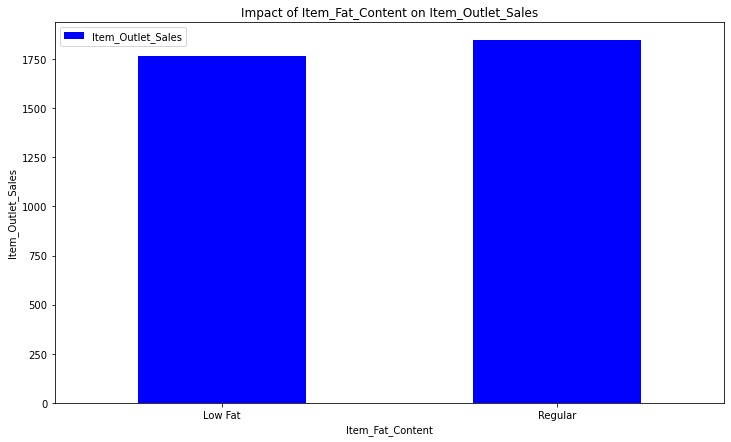

In [171]:
Item_Fat_Content_pivot=\
Train_data.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind="bar",color="blue",figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [172]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


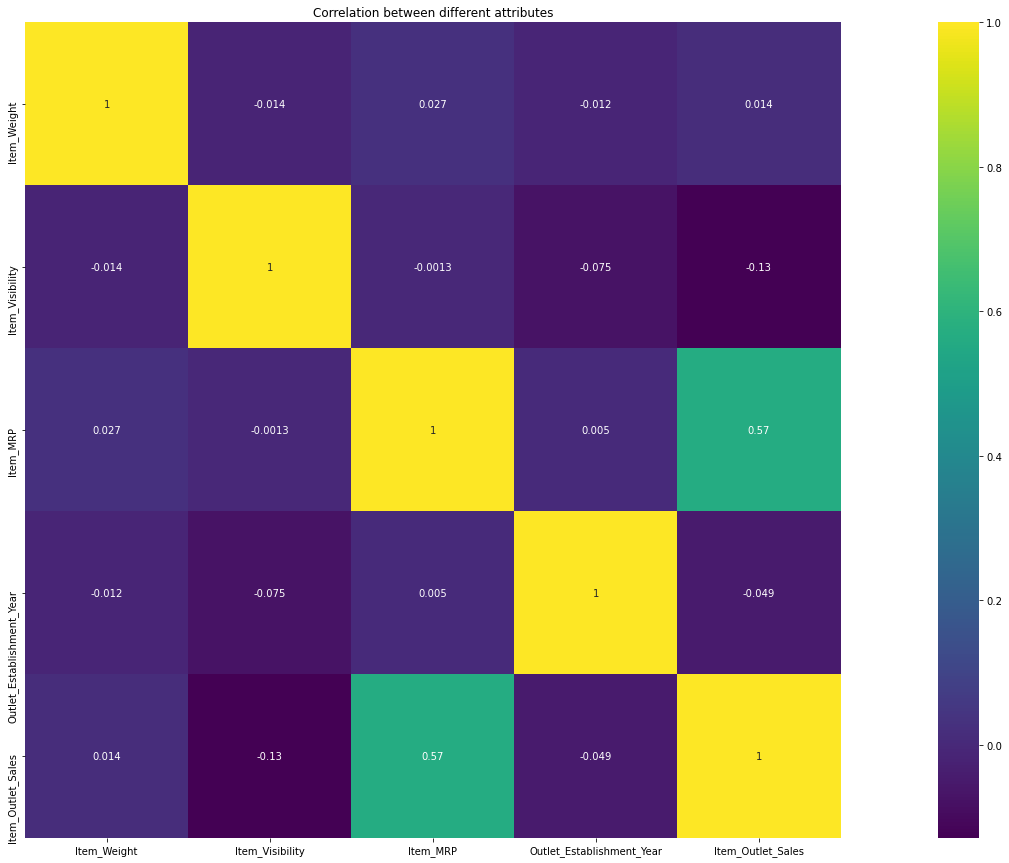

In [173]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_data.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Correlation between different attributes")
plt.show()

Feature Engineering and Transformation

Treating the Missing Values

Item_Weights

from the boxplot we noticed that the Item_Weight column is approximately Gaussian(Normal distribution) so it will be a good choice to replace the 'NaN' values with the Mean of the column

In [174]:
df['Item_Weight'].mean() #to replace NaN

12.792854228644991

In [175]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

Outlet_Size

We will be replacing the NaN values in the Outlet_Size column with Medium since we don't precisely know the outlet size,so we cannot say it is Large or it is Small, but Medium lies in between large and small so it is ideal to consider it that way and also the mode(i.e, outlet size that appears mostly) is Medum

In [176]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [177]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [178]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

As expected, the Item_Outlet_Sales will be having NULL values.Don't forget we have concatenated the Train_data and Test_data and most importantly the Test_data doe not have any column of Item_Outlet_Sales, it is only in the Train_data.Also you can notice that our df is consisting of 13 columns because our train_data was having 12 columns BUT our test data is having 11 columns so since it is not having the item_outlet_sales column, we we expect it to be filled with NaN. Besides that is our target column so we need not to worry about it.

Item Visibility

The Item_Visibiltiy had the minimum value 0 from our earlier descriptive statistics, but all the items needs tobe visible to the customers.Meaning those items that were not available obviously did have visibility and were captures as 0. This is an indication that we need to treat this as a missing value

In [179]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [180]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

Outlet Years

In [181]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [182]:
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Item Type

In [183]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

The item types are either Food, Drinks or Non-Consumables.

In [184]:
df['Item_Identifier'].value_counts()

FDH57    10
FDV23    10
NCZ30    10
NCL17    10
FDC41    10
         ..
FDM10     7
FDM50     7
FDX49     7
FDM52     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64

A closer look at each of the item_identifier shows that they either starts with either "FD"(Food),"DR"(Drinks) or "NC"(Non-Consumable) 3 categories

For us to do a better analysis, we will be creating 3 categories as ointed out instead of the already existing 16 categories

In [185]:
#Changing only the first 2 characters (i.e. the category ID)
df['New_Item_type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [186]:
#Rename them to more intuitive categories:
df['New_Item_type']=df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

**If a product is non-consumable then why associate a fat-content to them? We will get rid of this.**

In [187]:
#Mark non-consumables as seperate category in low_fat:
df.loc[df['New_Item_type']=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

**Under normal circumstance, if a product is more visible, then it's likely it will be getting higher sales. We can based on that hypothesis and create 
Importance given to a product in a given store according to the mean of significance given to the same product in all other stores.

In [188]:
item_visib_avg=df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [189]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [190]:
function=lambda x:x["Item_Visibility"]/item_visib_avg['Item_Visibility'][item_visib_avg.index==x['Item_Identifier']][0]
df['item_visib_avg']=df.apply(function,axis=1).astype(float)

In [191]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,15,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable,0.000000


**Dealing with our Categorical Variables

Label Encoder

We will be converting all categorical variables into numeric types(Values of 0 or 1) using the labelEncoder function since we cannot build an algoritm based on these object type variables


In [192]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

#New variable for outlet
df['Outlet']=label.fit_transform(df['Outlet_Identifier'])
varib=['Item_Fat_Content',"Outlet_Location_Type",'Outlet_Size','New_Item_type','Outlet_Type',"Outlet"]
for i in varib:
    df[i]=label.fit_transform(df[i])

In [193]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,14,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,4,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,14,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,15,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,26,2,0.000000,1


Now we need to create dummy variables for these Label encoded variables in order to avoid our algorithm ranking

In [195]:
#Dummy Variables
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
O

In [196]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0


MODEL BULDING

In [197]:
df.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)

In [198]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [199]:
train.drop(['source'],axis=1,inplace=True)

In [201]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [202]:
X_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1).copy()
y_train=train['Item_Outlet_Sales']
X_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

Linear Regression

In [203]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [204]:
lr_pred=lr.predict(X_test)

In [205]:
lr_pred

array([1837.   , 1570.625, 1870.625, ..., 1804.625, 3577.125, 1263.5  ])

In [206]:
lr_accuracy=round(lr.score(X_train,y_train)*100)
lr_accuracy

56

In [207]:
from sklearn.metrics import mean_squared_error

In [211]:
pred=lr.predict(X_train)

In [212]:
error=mean_squared_error(y_train,pred)

In [214]:
print(error**0.5)

1127.3585714931717


Decision Tree

In [215]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)

In [216]:
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [217]:
tree_accuracy=round(tree.score(X_train,y_train)*100)
tree_accuracy

62

In [224]:
pred=tree.predict(X_train)
error=mean_squared_error(y_train,pred)
print(error**0.5)

1058.2985231451355


RandomForestRegressor

In [220]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=1,n_jobs=4)

rf.fit(X_train,y_train)
rf_accuracy=round(rf.score(X_train,y_train)*100)
rf_accuracy

62

In [225]:
pred=rf.predict(X_train)
error=mean_squared_error(y_train,pred)
print(error**0.5)

1051.2348208817941


XGBoost Regressor

In [221]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1000,learnin_rate=0.05)
model.fit(X_train,y_train)

[20:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "learnin_rate" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learnin_rate=0.05, learning_rate=0.300000012, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [222]:
y_pred=model.predict(X_test)
y_pred

array([1006.4889, 1005.7229,  743.3022, ..., 2518.2437, 5493.426 ,
       1354.8066], dtype=float32)

In [223]:
model.score(X_train,y_train)

0.9969240938146288

In [226]:
pred=model.predict(X_train)
error=mean_squared_error(y_train,pred)
print(error**0.5)

94.63837144070607
